In [129]:
# This code is from
# https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython/blob/master/11SimulateMatches.py
# This code is adapted from
# https://dashee87.github.io/football/python/predicting-football-results-with-statistical-modelling/
# Original code
# https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-06-04-predicting-football-results-with-statistical-modelling.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

In [130]:
epl = pd.read_csv("https://www.football-data.co.uk/mmz4281/2324/I1.csv")
epl = epl[['HomeTeam','AwayTeam','FTHG','FTAG', 'HS', 'AS', 'HST', 'AST']]
epl = epl.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
#epl[:30]
epl = epl[20:]
epl[-10:]

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HS,AS,HST,AST
70,Empoli,Udinese,0,0,18,11,3,1
71,Lecce,Sassuolo,1,1,13,14,4,1
72,Inter,Bologna,2,2,14,8,5,3
73,Juventus,Torino,2,0,17,10,6,1
74,Genoa,Milan,0,1,7,12,1,3
75,Monza,Salernitana,3,0,16,8,7,5
76,Frosinone,Verona,2,1,11,16,2,4
77,Lazio,Atalanta,3,2,12,12,4,4
78,Cagliari,Roma,1,4,16,11,2,5
79,Napoli,Fiorentina,1,3,16,12,4,3


In [131]:
# Load csv

sheet_id = ""
sheet_name = ""
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
seriea_data = pd.read_csv(url)
seriea_data

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,...,xGD,xGD/90,Unnamed: 15,Prev season Rank V,Rank Value,Squad Rank,AVG,AVG Rank,Correl Rank/Table,avg_rank_weighted
0,1,Milan,8,7,0,1,16,8,8,21,...,5.0,0.63,NaN,0.250000,1.000000,0.333333,0.527778,2,0.873684,0.500000
1,2,Inter,8,6,1,1,21,5,16,19,...,9.4,1.18,NaN,0.333333,0.500000,0.500000,0.444444,3,NaN,0.333333
2,3,Juventus,8,5,2,1,14,6,8,17,...,6.6,0.82,NaN,0.142857,0.333333,0.250000,0.242063,4,NaN,0.250000
3,4,Fiorentina,8,5,2,1,18,11,7,17,...,-1.3,-0.16,NaN,0.125000,0.250000,0.125000,0.166667,7,NaN,0.142857
4,5,Napoli,8,4,2,2,17,9,8,14,...,10.5,1.31,NaN,1.000000,0.200000,1.000000,0.733333,1,NaN,1.000000
5,6,Atalanta,8,4,1,3,13,8,5,13,...,4.5,0.56,NaN,0.200000,0.166667,0.166667,0.177778,6,NaN,0.166667
6,7,Monza,8,3,3,2,8,7,1,12,...,2.1,0.27,NaN,0.090909,0.142857,0.071429,0.101732,9,NaN,0.111111
7,8,Frosinone,8,3,3,2,11,11,0,12,...,0.5,0.06,NaN,NaN,0.125000,0.050000,0.087500,12,NaN,0.083333
8,9,Lecce,8,3,3,2,9,10,-1,12,...,-4.5,-0.56,NaN,0.062500,0.111111,0.055556,0.076389,14,NaN,0.071429
9,10,Roma,8,3,2,3,19,12,7,11,...,5.1,0.64,NaN,0.166667,0.100000,0.200000,0.155556,8,NaN,0.125000


In [3]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [132]:
goal_model_data = pd.concat([epl[['HomeTeam','AwayTeam','HomeGoals', 'HS', 'HST', 'AS', 'AST']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals', 'HS': 'shots', 'HST': 'shots_on_target'}),
           epl[['AwayTeam','HomeTeam','AwayGoals', 'HS', 'HST', 'AS', 'AST']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals', 'AS': 'shots', 'AST': 'shots_on_target'})])

#goal_model_data =

In [133]:
#test = pd.merge(epl, goal_model_data, on="key")

for i in seriea_data['Squad']:
  goal_model_data.loc[(goal_model_data['team'] == i), 'HR'] = seriea_data.loc[(seriea_data['Squad'] == i)].avg_rank_weighted.values[0]

for i in seriea_data['Squad']:
  goal_model_data.loc[(goal_model_data['opponent'] == i), 'AR'] = seriea_data.loc[(seriea_data['Squad'] == i)].avg_rank_weighted.values[0]

In [134]:
goal_model_data[:10]

,team,opponent,goals,shots,shots_on_target,AS,AST,home,HS,HST,HR,AR
20,Sassuolo,Verona,3,16,7,11.0,3.0,1,NaN,NaN,0.076923,0.052632
21,Roma,Milan,1,13,2,9.0,4.0,1,NaN,NaN,0.125000,0.500000
22,Bologna,Cagliari,2,16,7,7.0,1.0,1,NaN,NaN,0.100000,0.050000
23,Udinese,Frosinone,0,12,6,12.0,2.0,1,NaN,NaN,0.066667,0.083333
24,Atalanta,Monza,3,18,8,8.0,2.0,1,NaN,NaN,0.166667,0.111111
25,Napoli,Lazio,1,22,4,6.0,2.0,1,NaN,NaN,1.000000,0.200000
26,Inter,Fiorentina,4,21,11,6.0,2.0,1,NaN,NaN,0.333333,0.142857
27,Torino,Genoa,1,10,3,7.0,2.0,1,NaN,NaN,0.090909,0.062500
28,Empoli,Juventus,0,7,0,18.0,5.0,1,NaN,NaN,0.058824,0.250000
29,Lecce,Salernitana,2,20,6,11.0,4.0,1,NaN,NaN,0.071429,0.055556


In [ ]:
# x = goal_model_data
# x['goals'] = x['goals'].astype(float)
# x['home'] = x['home'].astype(float)
# x['home'] = np.log1p(x.home)
# x['goals'] = np.log1p(x.goals)
# x

In [ ]:
# #Fit the model to the data
# #Home advantage included
# #Team and opponent as fixed effects.
# poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=x,
#                         family=sm.families.Poisson()).fit()
# poisson_model.summary()

In [158]:
#Fit the model to the data
#Home advantage included
#Team and opponent as fixed effects.
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  120
Model:                            GLM   Df Residuals:                       80
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -143.63
Date:                Thu, 19 Oct 2023   Deviance:                       92.829
Time:                        11:45:03   Pearson chi2:                     84.3
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5320
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0152      0.588      0.026      0.979      -1.137       1.168
team[T.Bologna]            -0.7076      0.531     -1.333      0.183      -1.748       0.333
team[T.Cagliari]           -1.4042      0.714     -1.967      0.049      -2.803      -0.005
team[T.Empoli]             -2.9185      1.087     -2.686      0.007      -5.048      -0.789
team[T.Fiorentina]          0.0445      0.467      0.095      0.924      -0.871       0.960
team[T.Frosinone]          -0.7333      0.535     -1.370      0.171      -1.782       0.316
team[T.Genoa]              -0.4817      0.547     -0.880      0.379      -1.554       0.591
team[T.Inter]               0.0308      0.481      0.064      0.949      -0.913       0.974
team[T.Juventus]           -0.1923      0.504     -0.381      0.703      -1.181       0.796
team[T.Lazio]               0.0977      0.517      0.189      0.850      -0.916       1.112
team[T.Lecce]              -1.4071      0.621     -2.264      0.024      -2.625      -0.189
team[T.Milan]              -0.1371      0.480     -0.286      0.775      -1.078       0.804
team[T.Monza]              -1.0296      0.598     -1.722      0.085      -2.202       0.142
team[T.Napoli]              0.0105      0.489      0.022      0.983      -0.948       0.969
team[T.Roma]                0.1773      0.465      0.381      0.703      -0.734       1.089
team[T.Salernitana]        -2.3656      1.078     -2.195      0.028      -4.478      -0.254
team[T.Sassuolo]            0.3700      0.467      0.793      0.428      -0.545       1.285
team[T.Torino]             -1.1611      0.599     -1.939      0.053      -2.335       0.013
team[T.Udinese]            -1.5476      0.689     -2.247      0.025      -2.898      -0.197
team[T.Verona]             -1.4367      0.822     -1.748      0.081      -3.048       0.174
opponent[T.Bologna]        -0.3901      0.757     -0.515      0.606      -1.874       1.094
opponent[T.Cagliari]        0.6713      0.533      1.258      0.208      -0.374       1.717
opponent[T.Empoli]          0.8761      0.557      1.572      0.116      -0.216       1.969
opponent[T.Fiorentina]      0.2106      0.603      0.349      0.727      -0.971       1.392
opponent[T.Frosinone]       0.2170      0.604      0.359      0.719      -0.966       1.400
opponent[T.Genoa]           0.5548      0.612      0.906      0.365      -0.645       1.755
opponent[T.Inter]           0.1746      0.663      0.263      0.792      -1.125       1.474
opponent[T.Juventus]       -0.2558      0.654     -0.391      0.696      -1.538       1.026
opponent[T.Lazio]           0.2716      0.583      0.466      0.641      -0.871       1.414
opponent[T.Lecce]           0.2461      0.610      0.404      0.686      -0.949       1.441
opponent[T.Milan]          -0.0353      0.593  

In [ ]:
# #Fit the model to the data
# #Home advantage included
# #Team and opponent as fixed effects.
# poisson_model = smf.glm(formula="goals ~ home + team + opponent + shots + shots_on_target", data=goal_model_data,
#                         family=sm.families.Poisson()).fit()
# poisson_model.summary()

In [121]:
home_team='Sassuolo'
away_team='Lazio'

In [159]:
#Predict for Arsenal vs. Manchester City

# https://stackoverflow.com/questions/65053036/predicting-claim-number-through-glm-model

home_score_rate=poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                       'home':1, 'shots': -0.0583, 'shots_on_target': 0.2638},index=[1]))
away_score_rate=poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                       'home':0, 'shots': -0.0583, 'shots_on_target': 0.2638},index=[1]))
print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))

Sassuolo against Lazio expect to score: 1    3.622571
dtype: float64
Lazio against Sassuolo expect to score: 1    2.336348
dtype: float64


In [160]:
#Lets just get a result
home_goals=np.random.poisson(home_score_rate)
away_goals=np.random.poisson(away_score_rate)
print(home_team + ': ' + str(home_goals[0]))
print(away_team + ': '  + str(away_goals[0]))

Sassuolo: 4
Lazio: 1


In [161]:
#Lets just get a result
hg = []
ag = []

for i in range(100000):
  hg.append(np.random.poisson(home_score_rate))
  ag.append(np.random.poisson(away_score_rate))
print(home_team + ': ' + str(sum(hg) / len(hg)))
print(away_team + ': '  + str(sum(ag) / len(ag)))

Sassuolo: [3.62834]
Lazio: [2.33751]


In [151]:
#Code to caluclate the goals for the match.
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):

    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
# team_pred = []

# for team_avg in [home_goals_avg, away_goals_avg]:
#     pred = []
#     for i in range(0, max_goals+1):
#         pred.append(stats.poisson.pmf(i, team_avg))
#     team_pred.append(pred)
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

In [152]:
max_goals=5
score_matrix=simulate_match(poisson_model, home_team, away_team, max_goals)
score_matrix

array([[0.0025827 , 0.0060341 , 0.00704887, 0.00548954, 0.00320637,
        0.00149824],
       [0.00935603, 0.02185894, 0.02553504, 0.01988624, 0.01161529,
        0.00542747],
       [0.01694644, 0.03959277, 0.04625124, 0.03601966, 0.02103861,
        0.0098307 ],
       [0.02046322, 0.0478092 , 0.05584946, 0.04349458, 0.02540462,
        0.0118708 ],
       [0.01853236, 0.04329805, 0.05057965, 0.03939055, 0.02300751,
        0.01075071],
       [0.01342696, 0.03137005, 0.03664567, 0.02853901, 0.01666926,
        0.00778904]])

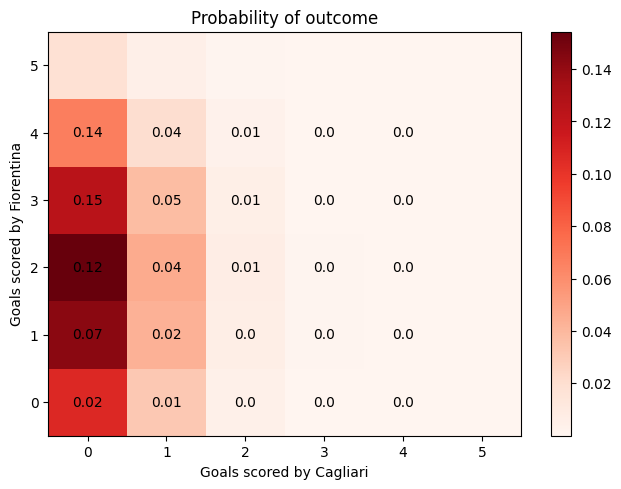

In [14]:
fig=plt.figure()

#Make 2d histogram of results

from pylab import rcParams
rcParams['figure.figsize'] = 12/2.54, 8/2.54
ax=fig.add_subplot(1,1,1)

pos=ax.imshow(score_matrix, extent=[-0.5,max_goals+0.5,-0.5,max_goals+0.5], aspect='auto', cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of outcome')
plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)

for i in range(5):
    for j in range(5):
        plt.annotate(str(round(pd.DataFrame(score_matrix).values[i][j], 2)),\
                     xy=(j, i),
                     ha='center', va='center', color='black')

plt.show()

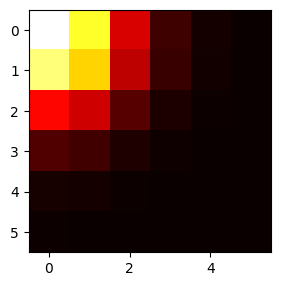

In [ ]:
# https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap

plt.imshow(score_matrix, cmap='hot', interpolation='nearest')
plt.show()

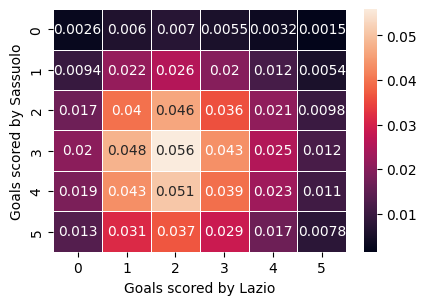

In [156]:
# https://www.geeksforgeeks.org/how-to-draw-2d-heatmap-using-matplotlib-in-python/

import seaborn as sns

ax = sns.heatmap(score_matrix, linewidth=0.5, annot=True)
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)

plt.show()

In [ ]:
score_matrix.shape

(6, 6)

In [154]:
#Home, draw, away probabilities
homewin=np.sum(np.tril(score_matrix, -1))
draw=np.sum(np.diag(score_matrix))
awaywin=np.sum(np.triu(score_matrix, 1))

round(homewin, 5), round(draw, 5), round(awaywin, 5)

(0.46847, 0.14498, 0.20066)

In [ ]:
[[1,2,3],[4,5,6],[7,8,9],[10,11,12]]

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]

In [ ]:
np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)

array([[ 0,  0,  0],
       [ 4,  0,  0],
       [ 7,  8,  0],
       [10, 11, 12]])

In [ ]:
np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

array([[ 1,  0,  0],
       [ 4,  5,  0],
       [ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], 1)

array([[ 1,  2,  0],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

How to Use the Poisson Distribution in Python

https://www.statology.org/poisson-distribution-python/

Calculate poisson probability percentage

https://stackoverflow.com/questions/280797/calculate-poisson-probability-percentage

Example 1: Probability Equal to Some Value

A store sells 3 apples per day on average. What is the probability that they will sell 5 apples on a given day?

In [169]:
from scipy.stats import poisson

#calculate probability
poisson.pmf(k=5, mu=3)


0.10081881344492458

Example 2: Probability Less than Some Value

A certain store sells seven footballs per day on average. What is the probability that this store sells four or less footballs in a given day?

In [166]:
from scipy.stats import poisson

#calculate probability
poisson.cdf(k=4, mu=7)

0.17299160788207146

In [181]:
from scipy.stats import poisson

#calculate probability
poisson.cdf(k=0.5, mu=3)

0.04978706836786395

Example 3: Probability Greater than Some Value

A certain store sells 15 cans of tuna per day on average. What is the probability that this store sells more than 20 cans of tuna in a given day?

In [164]:
from scipy.stats import poisson

#calculate probability
1-poisson.cdf(k=20, mu=15)

0.08297091003146029

In [180]:
from scipy.stats import poisson

#calculate probability
1-poisson.cdf(k=2.5, mu=3.0)

0.5768099188731564

How to Plot a Poisson Distribution
You can use the following syntax to plot a Poisson distribution with a given mean:

(array([1.66250000e-01, 1.94166667e-01, 1.83916667e-01, 1.39666667e-01,
        8.02500000e-02, 5.99166667e-02, 6.75000000e-03, 1.58333333e-03,
        7.50000000e-04, 8.33333333e-05]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

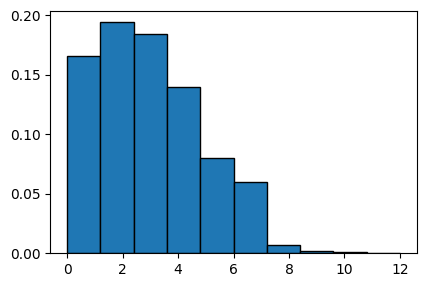

In [185]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

#generate Poisson distribution with sample size 10000
x = poisson.rvs(mu=3, size=10000)

#create plot of Poisson distribution
plt.hist(x, density=True, edgecolor='black')

In [172]:
import math

def poisson_probability(actual, mean):
    # naive:   math.exp(-mean) * mean**actual / factorial(actual)

    # iterative, to keep the components from getting too large or small:
    p = math.exp(-mean)
    for i in range(actual):
        p *= mean
        p /= i+1
    return p

poisson_probability(5, 3)

0.10081881344492447

https://stackoverflow.com/questions/46381930/poisson-probability-for-a-range-of-numbers-in-python

For a given discrete distribution, the **pmf** function calculates the probability of a particular value, and the **cdf** function calculates the probability of any value less than or equal to the given value:

In [194]:
poisson.pmf(6, 11.53)

0.032079528095748586

In [195]:
poisson.pmf([0,1,2,3,4,5,6], 11.5)

array([1.01300936e-05, 1.16496076e-04, 6.69852439e-04, 2.56776768e-03,
       7.38233209e-03, 1.69793638e-02, 3.25437806e-02])

In [189]:
sum(poisson.pmf([0,1,2,3,4,5,6], 11.5))

0.060269722823413086

If you want the probability of a range of values that doesn't start with zero, you can subtract **cdfs**, so the probability of **3 <= X <= 6** for X a Poisson variable with mean 11.5 is:

In [190]:
poisson.cdf(6, 11.5) - poisson.cdf(2, 11.5)

0.059473244214220844

In [191]:
sum(poisson.pmf([3,4,5,6], 11.5))

0.05947324421422075